In [56]:
import torch 
import os
import torchbearer


In [57]:
from os.path import exists
if not exists('data'):
    !wget -O boat-data.zip https://artist-cloud.ecs.soton.ac.uk/index.php/s/eAhIkhhdxgmhRHj/download
    !unzip boat-data.zip

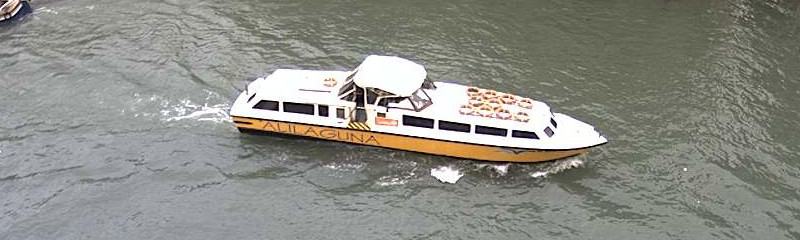

In [58]:
from IPython.display import Image
Image("data/test/Alilaguna/20130412_064059_20202.jpg")

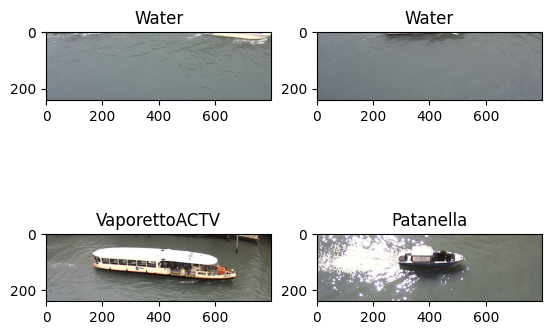

In [59]:
%matplotlib inline

# Plot ad hoc data instances
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms 
import matplotlib
import matplotlib.pyplot as plt
import numpy

transform = transforms.Compose([
    transforms.Resize((240, 800)),
    transforms.ToTensor()  # convert to tensor
])

train_dataset = ImageFolder("data/train", transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# generate the first batch
(batch_images, batch_labels) = train_loader.__iter__().__next__()

# plot 4 images
plt.subplot(221).set_title(train_dataset.classes[batch_labels[0]])
plt.imshow(batch_images[0].permute(1, 2, 0), aspect='equal')
plt.subplot(222).set_title(train_dataset.classes[batch_labels[1]])
plt.imshow(batch_images[1].permute(1, 2, 0), aspect='equal')
plt.subplot(223).set_title(train_dataset.classes[batch_labels[2]])
plt.imshow(batch_images[2].permute(1, 2, 0), aspect='equal')
plt.subplot(224).set_title(train_dataset.classes[batch_labels[3]])
plt.imshow(batch_images[3].permute(1, 2, 0), aspect='equal')

# show the plot
plt.show()

In [60]:
print(len(train_dataset))

3474


In [61]:
# the number of images that will be processed in a single step
batch_size=128
# the size of the images that we'll learn on - we'll shrink them from the original size for speed
image_size=(30, 100)

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()  # convert to tensor
])

train_dataset = ImageFolder("data/train", transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = ImageFolder("data/valid", transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = ImageFolder("data/test", transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [62]:
from torchvision.models import resnet50
from urllib.request import urlopen

imagenet_labels = urlopen("https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt").read().decode('utf-8').split("\n")

model = resnet50(pretrained=True)
model.eval()

preprocess_input = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

from PIL import Image as PImage
img_path = 'data/mf.jpg'
img = PImage.open(img_path)

print(preprocess_input(img))
preds = model(preprocess_input(img).unsqueeze(0))

_, indexes = preds.topk(5)
for i in indexes[0]:
    print('Predicted:', imagenet_labels[i])

/opt/homebrew/Caskroom/miniconda/base/envs/torch_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([[[ 0.7762,  0.7762,  0.7762,  ...,  0.6734,  0.6734,  0.6734],
         [ 0.8104,  0.8104,  0.8104,  ...,  0.7248,  0.7248,  0.7077],
         [ 0.8104,  0.8276,  0.8276,  ...,  0.7933,  0.7762,  0.7419],
         ...,
         [-1.4500, -1.1418, -1.3302,  ..., -0.9705,  0.1426,  0.0227],
         [-1.4843, -1.5357, -1.5528,  ..., -0.3369, -0.3541, -0.4226],
         [-1.6555, -1.8097, -1.5699,  ..., -0.0287, -0.5082, -0.6794]],

        [[ 0.9230,  0.9230,  0.9230,  ...,  0.8354,  0.8354,  0.8354],
         [ 0.9580,  0.9580,  0.9580,  ...,  0.8880,  0.8880,  0.8704],
         [ 0.9580,  0.9755,  0.9755,  ...,  0.9580,  0.9405,  0.9055],
         ...,
         [-1.5630, -1.2829, -1.4230,  ..., -1.2479, -0.1275, -0.3200],
         [-1.5805, -1.6681, -1.6331,  ..., -0.5476, -0.6001, -0.7402],
         [-1.7556, -1.9132, -1.6155,  ..., -0.2500, -0.7752, -0.9328]],

        [[ 1.1759,  1.1759,  1.1759,  ...,  1.1237,  1.1237,  1.1237],
         [ 1.2108,  1.2108,  1.2108,  ...,  1

In [75]:
from torch import nn
model = resnet50(pretrained=True)
model.avgpool = torch.nn.AdaptiveAvgPool2d((1,1))
model.fc = nn.Linear(2048, len(train_dataset.classes))
model.train()

/opt/homebrew/Caskroom/miniconda/base/envs/torch_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [91]:
new_model = nn.Sequential(*list(model.children())[:-3])
for x, y in train_loader:
    o = new_model(x)
    print(o.shape)
    break

torch.Size([128, 1024, 2, 7])


# Fine Tuning Just the Linear Layers

In [64]:
# Freeze layers by not tracking gradients
import torch.optim as optim
for param in model.parameters():
    param.requires_grad = False
model.fc.weight.requires_grad = True #unfreeze last layer weights
model.fc.bias.requires_grad = True #unfreeze last layer biases

optimiser = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4) #only optimse non-frozen layers

In [66]:
import time
import torchbearer
from torchbearer import Trial
from torch import optim


# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()

#device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = "mps"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(train_loader, val_generator=val_loader, test_generator=test_loader)
start_time = time.time()
trial.run(epochs=10)
end_time = time.time()
print("hi")
results = trial.evaluate(data_key=torchbearer.VALIDATION_DATA)
print(results)
print("RUN TIME: ", end_time-start_time)



0/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/28 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/4 [00:00<?, ?it/s]

hi


0/1(e):   0%|          | 0/4 [00:00<?, ?it/s]

{'val_loss': 0.8440359830856323, 'val_acc': 0.7189873456954956}
RUN TIME:  132.53489589691162


# Extracting Features from the Model

In [68]:
from torch import nn
model = resnet50(pretrained=True)
feature_extractor_model = nn.Sequential(*list(model.children())[:-2], nn.AdaptiveAvgPool2d((1,1)))
feature_extractor_model.eval()
feature_extractor_model = feature_extractor_model.to(device)

In [69]:
transform = transforms.Compose([
    transforms.Resize((240, 800)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225]),
])

img_path = 'data/test/Alilaguna/20130412_064059_20202.jpg'
img = PImage.open(img_path)
feature = feature_extractor_model(preprocess_input(img).unsqueeze(0).to(device))
print('Feature shape:', feature.shape)
print('Feature data:', feature[0].reshape(-1))

Feature shape: torch.Size([1, 2048, 1, 1])
Feature data: tensor([0.2249, 0.6554, 0.0546,  ..., 0.0076, 0.6553, 0.1452], device='mps:0',
       grad_fn=<ReshapeAliasBackward0>)


# Using SVM as the Linear Classifier

In [93]:


import numpy as np
from sklearn.model_selection import cross_val_score

#!wget -O Resnet50Features.zip https://artist-cloud.ecs.soton.ac.uk/index.php/s/P68OB07DquOwSR7/download
#!unzip Resnet50Features.zip

training_features = np.load('training_features.npy')
training_labels = np.load('training_labels.npy')

valid_features = np.load('valid_features.npy')
valid_labels = np.load('valid_labels.npy')

testing_features = np.load('testing_features.npy')
testing_labels = np.load('testing_labels.npy')

# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
print(cross_val_score(model, training_features, training_labels))
start_time = time.time()
model = model.fit(training_features, training_labels)
end_time = time.time()
pred = model.predict(testing_features)
print("Test: ", accuracy_score(pred, testing_labels))
print("RUN_TIME: ", end_time - start_time)

[0.82446043 0.84748201 0.83165468 0.83884892 0.85158501]
Test:  0.8716012084592145
RUN_TIME:  5.141760587692261


In [94]:
pred = model.predict(training_feeatures)
accuracy_score(pred, training_labels)

NameError: name 'training_feeatures' is not defined

In [95]:
training_features.shape

(3474, 2048)